<a href="https://colab.research.google.com/github/rohith-ze/Iris_classifier/blob/main/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Define the col names
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]
from sklearn.datasets import load_iris
#Read the dataset
#ds = pd.read_csv('/content/iris[1].csv')
ds=load_iris()
#Data
ds.head()
#Encoding the categorical column
ds = ds.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})

AttributeError: ignored

In [ ]:
#Encoding the categorical column
ds = ds.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
#Visualize the new dataset
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<ipython-input-39-5c904a1976ae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr())


Text(0.5, 1.0, 'Correlation On iris Classes')

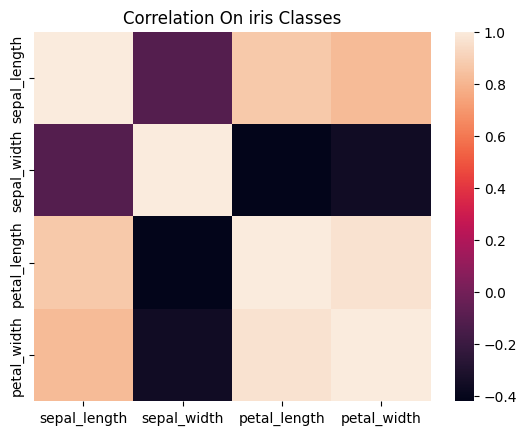

In [ ]:

plt.figure(1)
sns.heatmap(ds.corr())
plt.title('Correlation On iris Classes')

In [ ]:

X = ds.iloc[:,:-1]
y = ds.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)


In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %
